定义新命令
$$
\def\R{\mathbb{R}}
\def\C{\mathbb{C}}
\def\d#1{\mathrm{d}#1}
\def\bm#1{\boldsymbol#1}
$$

### 1.3 复指数信号与正弦信号
### 1.3.1 连续时间复指数信号
基波频率$w_0$，基波周期$T_0 = \frac{2\pi}{|w_0|}$为使$e^{jwT}=1$成立的最小$T$值
$$
x(t) = e^{jwt} = e^{jw_0(t+T)}
$$
对一个复指数信号$e^{jwt}$，有一公共周期$T_0$的必要条件是$e^{jwT_0}=1$，即$wT_0 = 2\pi k$，$w = \frac{2\pi}{T_0}k \coloneqq w_0 k$。一个成谐波关系的复指数信号的集合就是一组基波频率是$w_0$的整数倍的周期复指数信号
$$
\phi_k(t) = e^{jkw_0 t}, \quad k = 0, \pm{1}, \pm{2}, \cdots
$$
性质
1. $w_0$越大，信号震荡的速率就越高
2. $e^{jw_0 t}$对所有的$w_0$都是周期的

### 1.3.2 离散时间复指数信号
$$
x[n] = C \alpha^n = C e^{\beta n} = e^{jw_0 n}, \quad \beta 纯虚数
$$
性质
1. 低频部分在$\pi$的偶数倍值附近，高频部分在$\pi$的奇数倍值附近
2. $e^{jw_0 n}是周期的条件：$存在整数$m$，使得$w_0 N = 2\pi m$

### 1.5.1 简单系统举例
RC电路：输入$v_s(t)$与输出$v_c(t)$之间关系的微分方程
$$
\frac{\d{v_c(t)}}{\d{t}} + \frac{1}{RC} v_c(t) = \frac{1}{RC} v_s(t)
$$

### 用脉冲表示离散时间信号
离散时间单位脉冲序列的筛选性质
$$
x[n] = \sum_{k=-\infty}^\infty x[k] \delta[n-k]
$$
单位阶跃序列
$$
u[n] = \sum_{k=0}^\infty 1 \times \delta[n-k]
$$
总结：把$x[n]$表示为一组加权的基本函数的叠加，基本函数是移动单位脉冲$\delta[n-k]$

### 离散时间线性时不变（LTI）系统的单位脉冲响应及卷积和表示
令$h_k[n]$为该线性系统对移动单位脉冲$\delta[n-k]$的响应，则系统输出表示为
$$
y[n] = \sum_{k=-\infty}^\infty x[k] h_k[n] （线性系统叠加性质）
$$
若线性系统是时不变的，那么对时移的单位脉冲$\delta[n-k]$的响应$h_k[n]$也要移位，即因为$\delta[n-k]$是$\delta[n]$的时移，响应$h_k[n]$也是$h_0[n]$的一个时移
$$
h_k[n] = h_0[n-k] = h[n-k] （定义单位脉冲序列的响应h[n] \coloneqq h_0[n]）
$$
LTI系统的卷积和
$$
y[n] = \sum_{k=-\infty}^\infty x[k] h[n-k] \coloneqq x[n] * h[n]
$$
计算角度
1. 固定$n$值，将$x[k]$和$h[n-k]$看成关于$k$的函数，对所有$n$值重复这一过程，$h[n-k]$是单位脉冲响应$h[k]$的时间反转和移位$h[n-k] = h[-(k-n)]$
2. 用序列$h[n-k]$沿着$x[k]$滑动

### 连续时间线性时不变（LTI）系统：卷积积分
一个连续时间信号$x(t)$的阶梯形近似
$$
\hat{x}(t) = \sum_{k=-\infty}^\infty x(k\Delta) \delta_{\Delta}(t - k\Delta)\Delta, \quad \delta_{\Delta}(t) = 
\begin{cases}
\frac{1}{\Delta},\quad 0 \le t \le \Delta \\
0,\quad o.w.
\end{cases}
$$
当$\Delta \rightarrow 0$，$\delta_{\Delta}(t)$的极限就是单位冲击函数$\delta(t)$，连续冲击函数的筛选性质
$$
x(t) = \int_{-\infty}^\infty x(\tau) \delta(t - \tau) \mathrm{d}\tau
$$
定义系统对单位冲击函数$\delta(t)$的响应，即单位冲击响应为$h(t)$，则卷积积分
$$
y(t) = \int_{-\infty}^\infty x(\tau) h(t-\tau) \mathrm{d}\tau \coloneqq x(t) * h(t)
$$

### 线性时不变系统（LTI）的性质
- 交换律
$$
x[n] * h[n] = h[n] * x[n] = \sum_{k=-\infty}^\infty h[k] x[n-k] \\
x(t) * h(t) = h(t) * x(t) = \int_{-\infty}^\infty h(\tau) x(t-\tau) \mathrm{d}\tau
$$
- 分配律
$$
x[n] * (h_1[n] + h_2[n]) = x[n] * h_1[n] + x[n] * h_2[n] \\
x[t] * (h_1(t) + h_2(t)) = x[t] * h_1(t) + x[t] * h_2(t)
$$
- 结合律
$$
x[n] * (h_1[n] * h_2[n]) = (x[n] * h_1[n]) * h_2[n] \\
x[t] * (h_1(t) * h_2(t)) = (x[t] * h_1(t)) * h_2(t)
$$

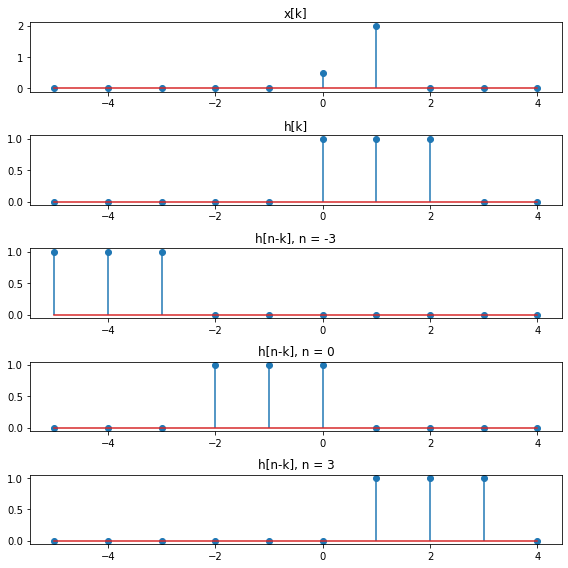

In [236]:
import numpy as np
import matplotlib.pyplot as plt

def x(n):
    res = [0.5 if i == 0 else 2 if i == 1 else 0 for i in n]
    return res

def h(n):
    res = [1 if i == 0 or i == 1 or i == 2 else 0 for i in n]
    return res

k = np.arange(-5, 5, 1)

plt.figure(figsize=(8, 8))

plt.subplot(5,1,1)
plt.stem(k, x(k))
plt.title('x[k]')

plt.subplot(5,1,2)
plt.stem(k, h(k))
plt.title('h[k]')

plt.subplot(5,1,3)
plt.stem(k, h(-3-k))
plt.title(f'h[n-k], n = -3')

plt.subplot(5,1,4)
plt.stem(k, h(0-k))
plt.title(f'h[n-k], n = 0')

plt.subplot(5,1,5)
plt.stem(k, h(3-k))
plt.title(f'h[n-k], n = 3')

plt.tight_layout()
plt.show()

### LTI系统对复指数信号的响应
连续时间信号$e^{st}, s\in \C$

离散时间信号$z^n, z \in \C$

复指数是LTI系统的特征函数：对某一给定的$s$值，常数$H(s)$就是与特征函数$e^{st}$有关的特征值，令$x(t) = e^{st}$
$$
\begin{align*}
y(t) &= \int_{-\infty}^\infty x(\tau) h(t-\tau) \mathrm{d}\tau = \int_{-\infty}^\infty h(\tau) x(t-\tau) \d{\tau} \\
&= \int_{-\infty}^\infty h(\tau) e^{s(t-\tau)} \d{\tau} = e^{st} \int_{-\infty}^\infty h(\tau) e^{-s\tau} \\
&= H(s) e^{st}, \quad H(s) \coloneqq \int_{-\infty}^\infty h(\tau) e^{-s\tau}
\end{align*}
$$
复指数序列是离散LTI系统的特征函数：对某一给定的$z$值，常数$H(z)$就是与特征函数$z^n$有关的特征值，令$x[n] = z^n$
$$
\begin{align*}
y[n] &= \sum_{k=-\infty}^\infty x[k] h[n-k] = \sum_{k=-\infty}^\infty h[k] x[n-k] \\
&= \sum_{k=-\infty}^\infty h[k] z^{n-k} = z^n \sum_{k=-\infty}^\infty h[k] z^{-k} \\
&= H(z) z^n \quad H(z) \coloneqq \sum_{k=-\infty}^\infty h[k] z^{-k}
\end{align*}
$$

### 连续时间周期信号的傅里叶级数表示
周期复指数信号$x(t) = e^{jw_0t}$，基波频率为$w_0$，基波周期为$T = \frac{2\pi}{w_0}$，与其成谐波关系的复指数信号为$\phi_k(t) = e^{jkw_0t} = e^{jk(\frac{2\pi}{T})t}$

傅里叶级数（由成谐波关系的复指数线性组合形成的信号），即综合公式（synthesis equation）
$$
x(t) = \sum_{k=-\infty}^\infty a_k e^{jkw_0t} = \sum_{k=-\infty}^\infty a_k e^{jk(\frac{2\pi}{T})t}
$$
对于实周期信号傅里叶级数有
$$
\sum_{k=-\infty}^\infty a_k e^{jkw_0t} = x(t) = x^{*}(t) = \sum_{k=-\infty}^\infty a_k^{*} e^{-jkw_0t} = \sum_{k=-\infty}^\infty a_{-k}^{*} e^{jkw_0t} \Rightarrow a_k = a_{-k}^{*} \Rightarrow a_k^{*} = a_{-k}
$$
则实周期信号傅里叶级数的三角形式为
$$
\begin{align*}
x(t) &= a_0 + \sum_{k=1}^\infty (a_k e^{jkw_0t} + a_{-k} e^{-jkw_0t}) = a_0 + \sum_{k=1}^\infty (a_k e^{jkw_0t} + a_k^* e^{-jkw_0t}) = a_0 + \sum_{k=1}^\infty 2\mathcal{Re}\{a_k e^{jkw_0t}\} \\
&= a_0 + \sum_{k=1}^\infty 2\mathcal{Re}\{A_k e^{j\theta_k} e^{jkw_0t}\} = a_0 + \sum_{k=1}^\infty 2\mathcal{Re}\{A_k e^{j(kw_0t + \theta_k)}\} = a_0 + 2\sum_{k=1}^\infty A_k \cos(k w_0 t + \theta_k)
\end{align*}
$$
傅里叶级数系数$\{a_k\}$，即分析公式（analysis equation）
$$
a_k = \frac{1}{T} \int_T x(t) e^{-jkw_0t} \d{t} = \frac{1}{T} \int_T x(t) e^{-jk(\frac{2\pi}{T})t} \d{t}
$$
对周期性方波$x(t) = \begin{cases}1, |t|<T_1 \\ 0, T_1 < |t| < \frac{T}{2}\end{cases}$，确定其傅里叶级数
$$
a_0 = \frac{1}{T}\int_{-T_1}^{T_1} \d{t} = \frac{2T_1}{T}, \quad T a_0 = 2 T_1 \\
a_k = \frac{1}{T}\int_{-T_1}^{T_1} e^{-jkw_0t} \d{t} = \frac{2\sin(k w_0 T_1)}{k w_0 T} = \frac{\sin(k w_0 T_1)}{k\pi}, \quad T a_k = \frac{2\sin(k w_0 T_1)}{k w_0} = \frac{2\sin(w T_1)}{w} |_{w = k w_0}
$$
当$T = 4T_1$时，$x(t)$是一半为1一半为0的方波，这时$w_0T_1 = \frac{w_0T}{4} = \frac{2\pi T}{4} = \frac{\pi}{2}$
$$
a_0 = \frac{1}{2} \\
a_k = \frac{\sin(\frac{k\pi}{2})}{k\pi}
$$

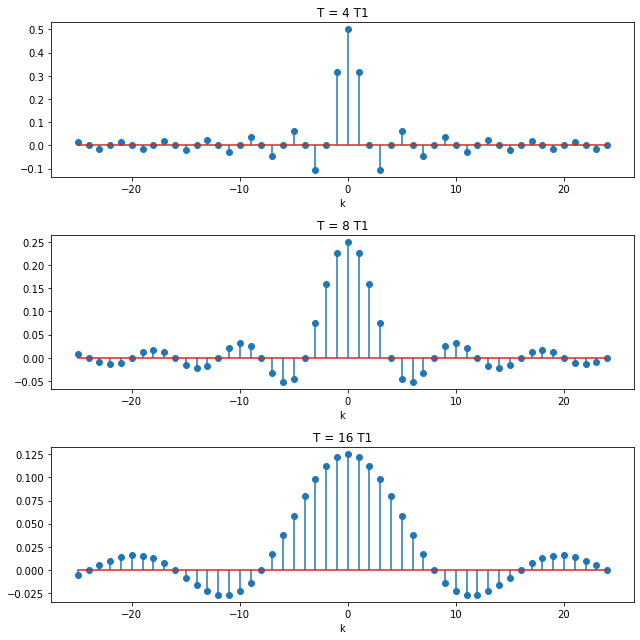

In [237]:
# 周期性方波的傅里叶级数，横坐标为k
T_1 = 1
k = np.arange(-25, 25, 1)
w = np.linspace(-1, 1, 100)

plt.figure(figsize=(9,9))
plt.subplot(3,1,1)
T = 4 * T_1
a = [2*T_1/T if i == 0 else np.sin(i * 2*np.pi/T * T_1) / (i * np.pi) for i in k]
plt.stem(k, a)
plt.xlabel('k')
plt.title('T = 4 T1')

plt.subplot(3,1,2)
T = 8 * T_1
a = [2*T_1/T if i == 0 else np.sin(i * 2*np.pi/T * T_1) / (i * np.pi) for i in k]
plt.stem(k, a)
plt.xlabel('k')
plt.title('T = 8 T1')

plt.subplot(3,1,3)
T = 16 * T_1
a = [2*T_1/T if i == 0 else np.sin(i * 2*np.pi/T * T_1) / (i * np.pi) for i in k]
plt.stem(k, a)
plt.xlabel('k')
plt.title('T = 16 T1')

plt.tight_layout()
plt.show()

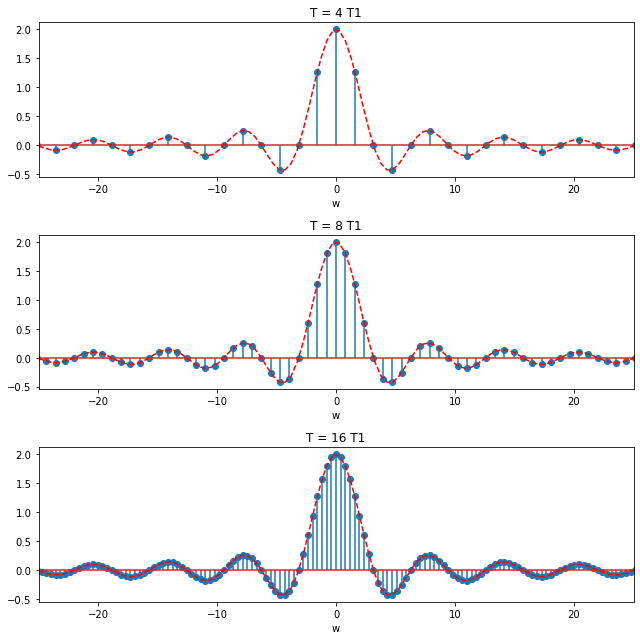

In [238]:
# 周期性方波的傅里叶级数及其包络，横坐标为w
T_1 = 1
k = np.arange(-100, 100, 1)
t = np.linspace(-25, 25, 100)

plt.figure(figsize=(9,9))
plt.subplot(3,1,1)
T = 4 * T_1
w_0 = 2 * np.pi / T
w = k * w_0
Tak = [2*T_1 if i == 0 else 2 * np.sin(i*T_1) / i for i in w]
plt.stem(w, Tak)
plt.plot(t, 2*np.sin(t*T_1)/t, '--r')
plt.xlabel('w')
plt.xlim([-25, 25])
plt.title('T = 4 T1')

plt.subplot(3,1,2)
T = 8 * T_1
w_0 = 2 * np.pi / T
w = k * w_0
Tak = [2*T_1 if i == 0 else 2 * np.sin(i*T_1) / i for i in w]
plt.stem(w, Tak)
plt.plot(t, 2*np.sin(t*T_1)/t, '--r')
plt.xlabel('w')
plt.xlim([-25, 25])
plt.title('T = 8 T1')

plt.subplot(3,1,3)
T = 16 * T_1
w_0 = 2 * np.pi / T
w = k * w_0
Tak = [2*T_1 if i == 0 else 2 * np.sin(i*T_1) / i for i in w]
plt.stem(w, Tak)
plt.plot(t, 2*np.sin(t*T_1)/t, '--r')
plt.xlabel('w')
plt.xlim([-25, 25])
plt.title('T = 16 T1')

plt.tight_layout()
plt.show()

### 离散时间周期信号的傅里叶级数表示
复指数$e^{jk\frac{2\pi}{N}n}$是周期的，周期为$N$
$$
\phi_k[n] = e^{jkw_0n} = e^{jk\frac{2\pi}{N}n}, \quad k = 0, \pm{1}, \cdots, \quad \phi_k[n] = \phi_{k+rN}[n]
$$
离散时间傅里叶级数，即综合公式（synthesis equation）
$$
x[n] = \sum_{k=<N>} a_k \phi_k[n] = \sum_{k=<N>} a_k e^{jkw_0n} = \sum_{k=<N>} a_k e^{jk\frac{2\pi}{N}n}
$$
离散时间傅里叶系数求解方法
1. 在$x[n]$的一个周期内对n的N个连续的值进行求值，即$x[0], x[1], \dots, x[N-1]$，解线性方程组
2. 与连续时间相同，求$a_k$的表达式，分析公式（analysis equation）
$$
a_k = \frac{1}{N} \sum_{n=<N>} x[n] e^{-jkw_0n} = \frac{1}{N} \sum_{n=<N>} x[n] e^{-jk\frac{2\pi}{N}n}, \quad a_k = a_{k+N}
$$
证明：
$$
\sum_{n=<N>} x[n] e^{-jr\frac{2\pi}{N}n} = \sum_{n=<N>} \sum_{k=<N>} a_k e^{j(k-r)\frac{2\pi}{N}n} = \sum_{k=<N>} a_k \sum_{n=<N>} e^{j(k-r)\frac{2\pi}{N}n} = N a_r \\
$$
其中用到性质：一个周期复指数序列的值在整个周期内求和，除非该复指数是某一常数，否则为0。证明如下：
$$
\sum_{n=<N>} e^{jk\frac{2\pi}{N}n} = (e^{jk\frac{2\pi}{N}})^0 + (e^{jk\frac{2\pi}{N}})^1 + \cdots + (e^{jk\frac{2\pi}{N}})^{N-1} = \begin{cases}N, k = 0, \pm{1}N, \cdots \\ \frac{1-e^{jk2\pi}}{1-e^{jk\frac{2\pi}{N}}} = 0, o.w.\end{cases}
$$


### 傅里叶系统与LTI系统
$x(t) = e^{st}$是连续时间LTI系统的输入，输出为$y(t) = H(s) e^{st}, s\in\C$，系统函数$H(s) = \int_{-\infty}^\infty h(\tau) e^{-st} \d{\tau}$。当$\mathcal{Re}\{s\} = 0$时, $s = jw, e^{st} = e^{jwt}$。具有$s = jw$的系统函数$H(s)$称为该系统的频率响应
$$
H(jw) = \int_{-\infty}^\infty h(t) e^{-jwt} \d{t}
$$

$x(n) = z^n$是离散时间LTI系统的输入，输出为$y(n) = H(z) z^n, s\in\C$，系统函数$H(z) = \sum_{k=-\infty}^\infty h(k) z^{-k}$。当$|z| = 1$时, $z = e^{jw}$。具有$z = e^{jw}$的系统函数$H(z)$称为该系统的频率响应
$$
H(e^{jw}) = \sum_{n=-\infty}^\infty h(n) e^{-jwn}
$$

连续时间情况，周期信号$x(t) = \sum_{k=-\infty}^\infty a_k e^{jkw_0t}$，加入单位冲击响应为$h(t)$的LTI系统中作为输入
$$
y(t) = \sum_{k=-\infty}^\infty a_k H(e^{jkw_0}) e^{jkw_0t}, \quad \{a_k H(e^{jkw_0})\}是y(t) 的一组傅里叶系数
$$
连续时间情况，周期信号$x(n) = \sum_{k=<N>} a_k e^{jk(\frac{2\pi}{N})n}$，加入单位冲击响应为$h(n)$的LTI系统中作为输入
$$
y[n] =  \sum_{k=<N>} a_k H(e^{jk(\frac{2\pi}{N})}) e^{jk(\frac{2\pi}{N})n},  \quad \{a_k H(e^{jk(\frac{2\pi}{N})})\}是y(n) 的一组傅里叶系数
$$
总结：系统输出的第k个傅里叶系数就是输入的第k个傅里叶系数，与该系统在对应频率点的频率响应值的乘积

### 滤波器种类：
- 频率成形滤波器：改变频谱形状的LTI系统
- 频率选择性滤波器：基本无失真地通过某些频率，显著地衰弱或消除掉另外一些频率的系统

### 用微分方程描述连续时间滤波器举例：
简单的RC低通滤波器（电阻resistance，电容capacitance），电压源$v_s(t)$是系统的输入，取电容器上的电压$v_c(t)$作为输出，实现低通滤波。这时输出与输入电压由常微分方程关联
$$
RC \frac{\d{v_c(t)}}{\d{t}} + v_c(t) = v_s(t)
$$
把输入电压$v_s(t) = e^{jwt}$，输出电压$v_c(t) = H(jw) e^{jwt}$代入，得到响应频率
$$
H(jw) = \frac{1}{1 + RC jw}
$$

时域特性：

系统单位冲击响应为$h(t) = \frac{1}{RC} e^{-\frac{t}{RC}} u(t)$，可以验证$H(jw) = \int_{-\infty}^\infty h(t) e^{-jwt} \d{t}$

其单位阶跃响应为$x(t) = (1 - e^{-\frac{t}{RC}}) u(t)$，怎么来的？？？当$v_s(t) = u(t)$，计算$v_c(t) = x(t)$

频域和时域之间的折衷：足够大的衰减 vs 系统对阶跃输入的响应时间

### 用差分方程描述离散时间滤波器举例：
- 递归的，具有无限长单位脉冲系统（IIR系统）
- 非递归的，具有有限长单位脉冲系统（FIR系统）

一阶递归离散时间滤波器，由一阶差分方程描述的LTI系统
$$
y[n] - a y[n-1] = x[n]
$$
把$x[n] = e^{jwn}$和$y[n] = H[e^{jw}] e^{jwn}$代入，得到系统频率响应
$$
H(e^{jw}) = \frac{1}{1 - a e^{-jw}}
$$
系统单位脉冲响应为$h[n] = a^n u[n]$，可以验证$H(e^{jw}) = \sum_{n=-\infty}^\infty h[n] e^{-jwn}$

阶跃响应$s[n] = \frac{1 - a^{n+1}}{1 - a} u[n]$

FIR非递归差分方程一般形式
$$
y[n] = \sum_{k=-N}^M b_k x[n-k]
$$

## 连续时间傅里叶变换

### 非周期傅里叶变化
周期信号$\tilde{x}(t) = \sum_{k=-\infty}^{\infty} a_k e^{jkw_0t}$，其一个周期为$x(t)$
$$
a_k = \frac{1}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} \tilde{x}(t) e^{-jkw_0t} \d(t) = \frac{1}{T} \int_{-\infty}^{\infty} x(t) e^{-jkw_0t} \d(t) = \frac{1}{T} X(jw)|_{w=kw_0}
$$
定义$T a_k$的包络
$$
X(jw) = \int_{-\infty}^{\infty} x(t) e^{-jwt} \d{t}, 称为x(t)的傅里叶变换、频谱
$$
$\tilde{x}(t)$可以用$X(jw)$表示为
$$
\tilde{x}(t) = \sum_{k=-\infty}^{\infty} \frac{1}{T} X(jkw_0) e^{jkw_0t} = \frac{1}{2\pi} \sum_{k=-\infty}^{\infty} X(jkw_0) e^{jkw_0t} w_0
$$
令$T \rightarrow \infty$，即$w_0\rightarrow 0$，则傅里叶逆变换
$$
x(t) = \frac{1}{2\pi} \int_{-\infty}^\infty X(jw) e^{jwt} \d{w}
$$

### 周期信号的傅里叶变换
考虑一个信号$x(t)$其傅里叶变换$X(jw)$是一个面积为$2\pi$，出现在$w=w_0$处的一个单独的冲激，即$X(jw) = 2\pi \delta(w-w_0)$，则$x(t)$可由傅里叶逆变换得到
$$
x(t) = \frac{1}{2\pi} \int_{-\infty}^\infty X(jw) e^{jwt} \d{w} = \frac{1}{2\pi} \int_{-\infty}^\infty 2\pi \delta(w-w_0) e^{jwt} \d{w} = e^{jw_0t}
$$
如果$X(jw)$是频率上等间隔的一组冲激函数的线性组合，即$X(jw) = 2\pi \sum_{k=-\infty}^\infty a_k \delta(w-kw_0)$，可得
$$
x(t) = \frac{1}{2\pi} \int_{-\infty}^\infty 2\pi \sum_{k=-\infty}^\infty a_k \delta(w-kw_0) e^{jwt} \d{w} = \sum_{k=-\infty}^\infty a_k e^{jkw_0t}
$$
总结：一个傅里叶级数为$\{a_k\}$的周期信号$x(t)$的傅里叶变换，是谐波频率上的一串冲激函数，各冲激的面积正比于$a_k$，是其$2\pi$倍

### 卷积性质
线性系统的单位冲击响应为$h(t)$，其对复指数信号$e^{jkw_0t}$的响应是$H(jkw_0)e^{jkw_0t}$，可以看出频率响应$H(jw)$是单位冲激响应$h(t)$的傅里叶变换
$$
H(jkw_0) = \int_{-\infty}^\infty h(t) e^{-jkw_0t}\d{t}
$$
输入系统的信号
$$
x(t) = \frac{1}{2\pi} \int_{-\infty}^\infty X(jw) e^{jwt}\d{w} = \lim_{w_0\rightarrow 0}\frac{1}{2\pi} \sum_{k=-\infty}^\infty X(jkw_0) e^{jkw_0t} w_0
$$
系统对$x(t)$的响应为
$$
y(t) = \lim_{w_0\rightarrow 0}\frac{1}{2\pi} \sum_{k=-\infty}^\infty X(jkw_0) H(jkw_0) e^{jkw_0t} w_0 = \frac{1}{2\pi} \int_{-\infty}^\infty X(jw) H(jw) e^{jwt}\d{w} \coloneqq \frac{1}{2\pi} \int_{-\infty}^\infty Y(jw) e^{jwt}\d{w}
$$
两个信号卷积的傅里叶变化等于它们的傅里叶变换的乘积
$$
\mathcal{h(t) * x(t)} = Y(jw) = H(jw) X(jw)
$$

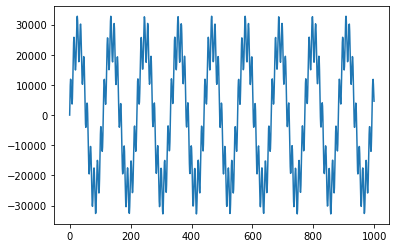

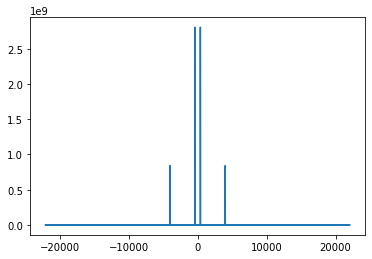

In [239]:
SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)
plt.plot(normalized_tone[:1000])
plt.show()

# from scipy.io.wavfile import write
# Remember SAMPLE_RATE = 44100 Hz is our playback rate
# write("mysinewave.wav", SAMPLE_RATE, normalized_tone)

from scipy.fft import fft, fftfreq, fftshift
N = SAMPLE_RATE * DURATION # Number of samples in normalized_tone
yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)
plt.plot(xf, np.abs(yf))
plt.show()

## 离散时间的傅里叶变化
### 推导（类似于连续时间情况）
给定有限长序列$x[n]$，由$x[n]$构成的周期序列$\tilde{x}[n]$
$$
\tilde{x}[n] = \sum_{k=<N>} a_k e^{jk(\frac{2\pi}{N})n}, \quad a_k = \frac{1}{N} \sum_{n=<N>} \tilde{x}[n] e^{-jk(\frac{2\pi}{N})n}
$$
在$-N_1 \le n \le N_2$的周期上$x[n] = \tilde{x}[n]$
$$
a_k = \frac{1}{N} \sum_{n=-N_1}^{N_2} x[n] e^{-jk(\frac{2\pi}{N})n} = \frac{1}{N} \sum_{n=-\infty}^{\infty} x[n] e^{-jk(\frac{2\pi}{N})n} = \frac{1}{N} X(e^{jkw_0}) = \frac{1}{N} X(e^{jw})|_{w=kw_0}, \quad X(e^{jw}) \coloneqq \sum_{n=-\infty}^{\infty} x[n] e^{-jwn}, \quad x(t)的频谱，分析公式（analysis equation）
$$
因此$\tilde{x}[n]$可以写成
$$
\tilde{x}[n] = \sum_{k=<N>} \frac{1}{N} X(e^{jkw_0}) e^{jkw_0n} = \frac{1}{2\pi} \sum_{k=<N>} X(e^{jkw_0}) e^{jkw_0n} w_0
$$
随着$N\rightarrow \infty$
$$
x[n] = \frac{1}{2\pi} \int_{2\pi} X(e^{jw}) e^{jwn} \d{w}, \quad 综合公式（synthesis equation）
$$
总结：一个周期信号$\tilde{x}[n]$的傅里叶级数，可以用一个有限长序列$x[n]$（一个周期上的$\tilde{x}[n]$）的傅里叶变换的等间隔样本来表示

### 周期信号的傅里叶变换
考虑周期信号$x[n] = e^{jw_0n}$，其傅里叶变换是冲激串
$$
X(e^{jw}) = \sum_{l=-\infty}^\infty 2\pi \delta(w - w_0 - 2\pi l)
$$
验证：代入综合公式得
$$
x[n] = \frac{1}{2\pi} \int_{2\pi} \sum_{l=-\infty}^\infty 2\pi \delta(w - w_0 - 2\pi l) e^{jwn} \d{w} = e^{j(w_0 + 2\pi r)n} = e^{jw_0 n}
$$
考虑周期序列$x[n]$，周期为$N$，其傅里叶级数为
$$
x[n] = \sum_{k=<N>} a_k e^{jk(\frac{2\pi}{N})n}
$$
其傅里叶变换为
$$
X(e^{jw}) = \sum_{k=-\infty}^\infty 2\pi a_k \delta(w - \frac{2\pi k}{N})
$$
由于$a_k$的周期性，$X(e^{jw})$可以看作基波频率$\frac{2\pi}{N}$的整数倍频率上的一串冲激，位于$\frac{2\pi k}{N}$处的冲激面积是$2\pi a_k$

In [240]:
# 周期信号x[n] = cos(w_0 n) = 1/2 * e^{jw_0 n} + 1/2 * e^{-jw_0 n}, w_0 = 2*pi/5, T = 5, f = 1/5
w_0 = 2 * np.pi / 5

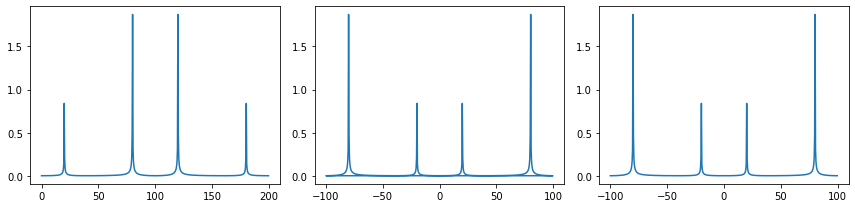

In [241]:
fs = 200
N = 512
f1 = 20
f2 = 80
k = np.arange(N)
t = k / fs
x = 0.9 * np.sin(2 * np.pi * f1 * t) + 2 * np.sin(2 * np.pi * f2 * t)
y = fft(x, N)

plt.figure(figsize=(12, 3))

plt.subplot(1,3,1)
fy = k * fs / N # [0, 1, ..., N-1] * fs / N
ampy = 2 * abs(y) / N # where is multiple 2 from?
plt.plot(fy, ampy)

plt.subplot(1,3,2) # 可以看到底部有一条直线，其实是反复的折线，原因是没有shift频率，不是由小到大
fy = fftfreq(n=N, d=1/fs) # [0, 1, ..., N/2-1, -N/2, ..., -1] / (d*n) if N is even; [0, 1, ..., (N-1)/2, -(N-1)/2, ..., -1] / (d*N)  if n is odd
ampy = 2 * abs(y) / N
plt.plot(fy, ampy)

plt.subplot(1,3,3) # shift频率至由小到大，图片正常
fy = fftshift(fftfreq(n=N, d=1/fs)) # [-N/2, ..., -1, 0, 1, ..., N/2-1] / (d*n) if N is even; [-(N-1)/2, ..., -1, 0, 1, ..., (N-1)/2] / (d*N)  if n is odd
ampy = 2 * abs(fftshift(y)) / N
plt.plot(fy, ampy)

plt.tight_layout()
plt.show()


